In [1]:
#importing dependencies

import numpy as np
import pandas as pd
import matplotlib
matplotlib.rcParams['figure.dpi'] = 120 #resolution
matplotlib.rcParams['figure.figsize'] = (8,6) #figure size
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
color = sns.color_palette()

In [2]:
#Data

aisles = pd.read_csv('aisles.csv')
departments = pd.read_csv('departments.csv')
orders = pd.read_csv('orders.csv')
order_products_prior = pd.read_csv('order_products__prior.csv')
order_products_train = pd.read_csv('order_products__train.csv')
products = pd.read_csv('products.csv')

In [3]:
order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [4]:
order_products_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [5]:
order_products_train.shape

(1384617, 4)

In [6]:
order_products_prior.shape

(32434489, 4)

In [7]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [8]:
#combining the data for better analysis

order_products = order_products_prior.append(order_products_train)
order_products.shape

(33819106, 4)

In [9]:
order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [10]:
order_products['product_id'].nunique()

49685

In [11]:
products.head()


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [12]:
products['product_id'].nunique()

49688

In [13]:
order_products = order_products.merge(products, on = 'product_id', how = 'left')
order_products = order_products.merge(aisles, on ='aisle_id', how='left')
order_products = order_products.merge(departments, on ='department_id', how='left')
order_products = order_products.merge(orders, on='order_id', how='left')
order_products.shape

(33819106, 15)

In [14]:
#final dataframe
order_products.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs,202279,prior,3,5,9,8.0
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce,202279,prior,3,5,9,8.0
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry,202279,prior,3,5,9,8.0
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry,202279,prior,3,5,9,8.0
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry,202279,prior,3,5,9,8.0


In [15]:
order_products['product_name'].nunique()

49685

In [16]:
order_products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33819106 entries, 0 to 33819105
Data columns (total 15 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   product_id              int64  
 2   add_to_cart_order       int64  
 3   reordered               int64  
 4   product_name            object 
 5   aisle_id                int64  
 6   department_id           int64  
 7   aisle                   object 
 8   department              object 
 9   user_id                 int64  
 10  eval_set                object 
 11  order_number            int64  
 12  order_dow               int64  
 13  order_hour_of_day       int64  
 14  days_since_prior_order  float64
dtypes: float64(1), int64(10), object(4)
memory usage: 4.0+ GB


In [17]:
def reduce_memory(df):
    
    """
    This function reduce the dataframe memory usage by converting it's type for easier handling.
    
    Parameters: Dataframe
    Return: Dataframe
    """
    
    start_mem_usg = df.memory_usage().sum() / 1024**2 
    print("Memory usage of properties dataframe is :",start_mem_usg," MB")
    
    for col in df.columns:
        if df[col].dtypes in ["int64", "int32", "int16"]:
            
            cmin = df[col].min()
            cmax = df[col].max()
            
            if cmin > np.iinfo(np.int8).min and cmax < np.iinfo(np.int8).max:
                df[col] = df[col].astype(np.int8)
            
            elif cmin > np.iinfo(np.int16).min and cmax < np.iinfo(np.int16).max:
                df[col] = df[col].astype(np.int16)
            
            elif cmin > np.iinfo(np.int32).min and cmax < np.iinfo(np.int32).max:
                df[col] = df[col].astype(np.int32)
        
        if df[col].dtypes in ["float64", "float32"]:
            
            cmin = df[col].min()
            cmax = df[col].max()
            
            if cmin > np.finfo(np.float16).min and cmax < np.finfo(np.float16).max:
                df[col] = df[col].astype(np.float16)
            
            elif cmin > np.finfo(np.float32).min and cmax < np.finfo(np.float32).max:
                df[col] = df[col].astype(np.float32)
    
    print("")
    print("___MEMORY USAGE AFTER COMPLETION:___")
    mem_usg = df.memory_usage().sum() / 1024**2 
    print("Memory usage is: ",mem_usg," MB")
    print("This is ",100*mem_usg/start_mem_usg,"% of the initial size")
    
    return df

In [18]:
order_products = reduce_memory(order_products)


Memory usage of properties dataframe is : 4128.308837890625  MB

___MEMORY USAGE AFTER COMPLETION:___
Memory usage is:  2031.902006149292  MB
This is  49.21875 % of the initial size


In [19]:
#removing the unnecessary df

In [20]:
del products

In [21]:
del orders, order_products_prior, order_products_train, aisles, departments, reduce_memory

In [22]:
#final dataframe information
order_products.describe()

,order_id,product_id,add_to_cart_order,reordered,aisle_id,department_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,3.381911e+07,3.381911e+07,3.381911e+07,3.381911e+07,3.381911e+07,3.381911e+07,3.381911e+07,3.381911e+07,3.381911e+07,3.381911e+07,31741038.0
mean,1.710566e+06,2.557551e+04,8.367738e+00,5.900617e-01,7.121799e+01,9.918544e+00,1.029444e+05,1.713998e+01,2.737285e+00,1.343123e+01,NaN
std,9.874008e+05,1.409770e+04,7.139540e+00,4.918220e-01,3.819898e+01,6.281655e+00,5.946733e+04,1.749829e+01,2.093296e+00,4.246149e+00,0.0
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,8.554130e+05,1.351900e+04,3.000000e+00,0.000000e+00,3.100000e+01,4.000000e+00,5.143500e+04,5.000000e+00,1.000000e+00,1.000000e+01,5.0
50%,1.710660e+06,2.525600e+04,6.000000e+00,1.000000e+00,8.300000e+01,9.000000e+00,1.026260e+05,1.100000e+01,3.000000e+00,1.300000e+01,8.0
75%,2.565587e+06,3.793500e+04,1.100000e+01,1.000000e+00,1.070000e+02,1.600000e+01,1.544120e+05,2.400000e+01,5.000000e+00,1.600000e+01,15.0
max,3.421083e+06,4.968800e+04,1.450000e+02,1.000000e+00,1.340000e+02,2.100000e+01,2.062090e+05,1.000000e+02,6.000000e+00,2.300000e+01,30.0


In [23]:
#datatypes
order_products.dtypes

order_id                    int32
product_id                  int32
add_to_cart_order           int16
reordered                    int8
product_name               object
aisle_id                    int16
department_id                int8
aisle                      object
department                 object
user_id                     int32
eval_set                   object
order_number                 int8
order_dow                    int8
order_hour_of_day            int8
days_since_prior_order    float16
dtype: object

In [24]:
temp_df = order_products.groupby("aisle")["reordered"].agg(['count', 'sum']).rename(columns = {'count':'total','sum':'reorders'})
#temp_df = temp_df.sort_values('total', ascending=False).reset_index()

In [25]:
temp_df= temp_df.sort_values('total', ascending=False).reset_index()

In [26]:
temp_df

,aisle,total,reorders
0,fresh fruits,3792661,2726251.0
1,fresh vegetables,3568630,2123540.0
2,packaged vegetables fruits,1843806,1178700.0
3,yogurt,1507583,1034957.0
4,packaged cheese,1021462,598280.0
...,...,...,...
129,eye ear care,9522,2100.0
130,baby bath body care,8909,2626.0
131,baby accessories,8466,4669.0
132,beauty,6455,1374.0


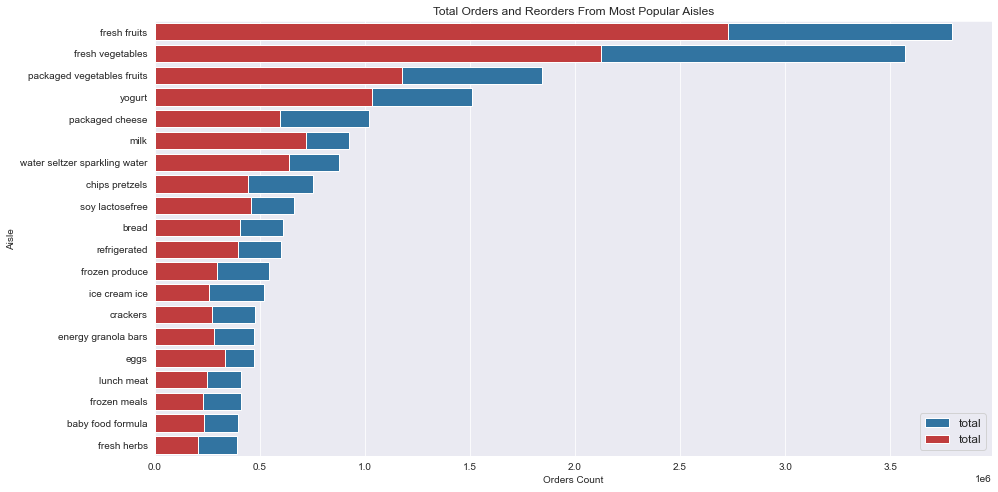

In [27]:
fig, ax = plt.subplots(figsize =(15,8))
ax = sns.barplot(y = temp_df.aisle[0:20], x = temp_df.total[0:20], color=color[0], label = "total")
ax = sns.barplot(y = temp_df.aisle[0:20], x = temp_df.reorders[0:20], color=color[3],label = "total")
ax.set_ylabel("Aisle")
ax.set_xlabel("Orders Count")
ax.set_title("Total Orders and Reorders From Most Popular Aisles")
ax.legend(loc = 4, prop={'size': 12})
plt.show()

# Graph Analysis

1. We can notice that most popular aisles is fresh fruits as the total orders and total Reorders are more compared to others.
2. Least popular items are fresh herbs
3. In all there are 49685 products which are distributed in 134 aisles
4. The reorder ratio is more for Milk and least for spices which is obvious as milk can be a everyday need and spices are not bougth on daily basis

In [28]:
temp_df['reorder_ratio'] = temp_df['reorders']/temp_df['total']
temp_df = temp_df.sort_values("reorder_ratio", ascending=False).reset_index()

In [29]:
temp_df

,index,aisle,total,reorders,reorder_ratio
0,5,milk,923659,722128.0,0.781812
1,6,water seltzer sparkling water,878150,640988.0,0.729930
2,0,fresh fruits,3792661,2726251.0,0.718823
3,15,eggs,472009,333408.0,0.706359
4,8,soy lactosefree,664493,460069.0,0.692361
...,...,...,...,...,...
129,132,beauty,6455,1374.0,0.212858
130,125,first aid,11411,2235.0,0.195864
131,128,kitchen supplies,9620,1874.0,0.194802
132,108,baking supplies decor,24786,4154.0,0.167595


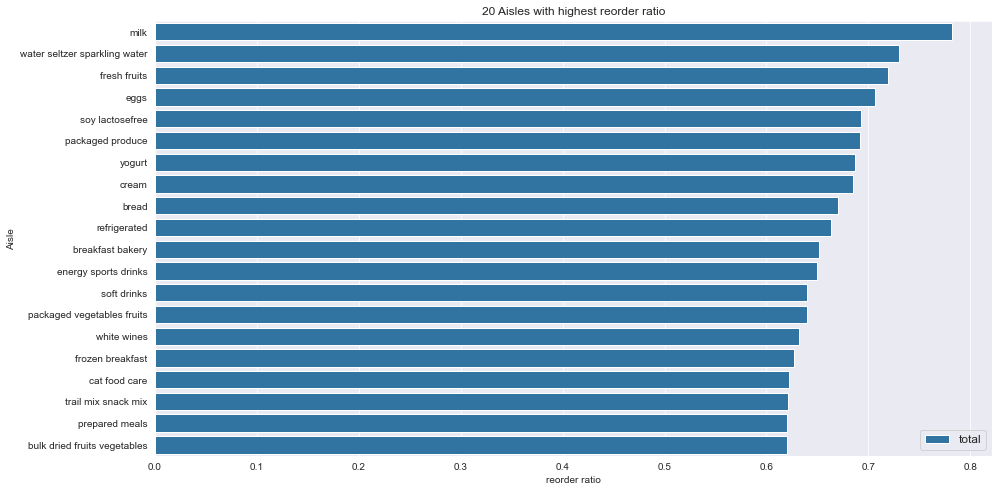

In [30]:
fig, ax = plt.subplots(figsize =(15,8))
ax = sns.barplot(y = temp_df.aisle[0:20], x = temp_df.reorder_ratio[0:20], color=color[0], label = "total")
ax.set_ylabel("Aisle")
ax.set_xlabel("reorder ratio")
ax.set_title("20 Aisles with highest reorder ratio")
ax.legend(loc = 4, prop={'size': 12})
plt.show()

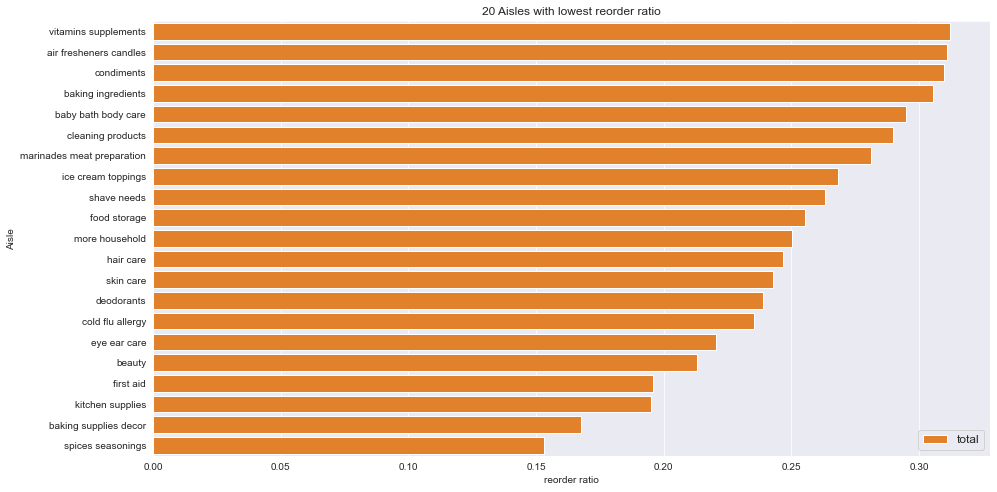

In [31]:
fig, ax = plt.subplots(figsize =(15,8))
ax = sns.barplot(y = temp_df.aisle[-21:], x = temp_df.reorder_ratio[-21:], color=color[1], label = "total")
ax.set_ylabel("Aisle")
ax.set_xlabel("reorder ratio")
ax.set_title("20 Aisles with lowest reorder ratio")
ax.legend(loc = 4, prop={'size': 12})
plt.show()

### Departments

In [32]:
order_products['department'].unique()

array(['dairy eggs', 'produce', 'pantry', 'meat seafood', 'bakery',
       'personal care', 'snacks', 'breakfast', 'beverages', 'deli',
       'household', 'international', 'dry goods pasta', 'frozen',
       'canned goods', 'babies', 'pets', 'alcohol', 'bulk', 'missing',
       'other'], dtype=object)

In [33]:
len(order_products['department'].unique())

21

In [34]:
order_products[order_products['department']=='missing']

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
629,75,44077,13,0,Tomato Basil Bisque Soup,100,21,missing,missing,106387,prior,1,5,19,NaN
1419,154,41801,3,1,Cold Pressed Watermelon & Lemon Juice Blend,100,21,missing,missing,73310,prior,68,6,19,0.0
1420,154,11806,4,0,Paleo Blueberry Muffin,100,21,missing,missing,73310,prior,68,6,19,0.0
3975,420,7456,4,0,Organic Poblano Pepper,100,21,missing,missing,161762,prior,37,2,11,2.0
4778,501,3884,11,0,Organic Plain Unsweetened Nondairy Cashew Yogurt,100,21,missing,missing,86142,prior,40,2,12,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33818393,3419531,24974,12,1,Caramel Custard Yogurt,100,21,missing,missing,43300,train,32,2,15,6.0
33818435,3419601,27767,5,1,Plain Organic Grassmilk Yogurt Cup,100,21,missing,missing,109812,train,89,5,20,6.0
33818698,3420257,41149,26,1,Organic Riced Cauliflower,100,21,missing,missing,92532,train,35,6,17,7.0
33818701,3420257,15576,29,0,Uncured Beef Hot Dog,100,21,missing,missing,92532,train,35,6,17,7.0


In [35]:
#order_products['department'].fillna('Misc',inplace=True)

In [36]:
order_products['department'].unique()

array(['dairy eggs', 'produce', 'pantry', 'meat seafood', 'bakery',
       'personal care', 'snacks', 'breakfast', 'beverages', 'deli',
       'household', 'international', 'dry goods pasta', 'frozen',
       'canned goods', 'babies', 'pets', 'alcohol', 'bulk', 'missing',
       'other'], dtype=object)

In [37]:
#replacing missing values with miscallaneous
order_products['department'] = order_products['department'].replace(['missing'],'Misc')


In [38]:
temp_df = order_products.groupby("department")["reordered"].agg(['count', 'sum']).rename(columns = {'count':'total','sum':'reorders'})
temp_df = temp_df.sort_values('total', ascending=False).reset_index()

In [39]:
temp_df

,department,total,reorders
0,produce,9888378,6432596.0
1,dairy eggs,5631067,3773723.0
2,snacks,3006412,1727075.0
3,beverages,2804175,1832952.0
4,frozen,2336858,1268058.0
5,pantry,1956819,679799.0
6,bakery,1225181,769880.0
7,canned goods,1114857,511317.0
8,deli,1095540,666231.0
9,dry goods pasta,905340,418466.0


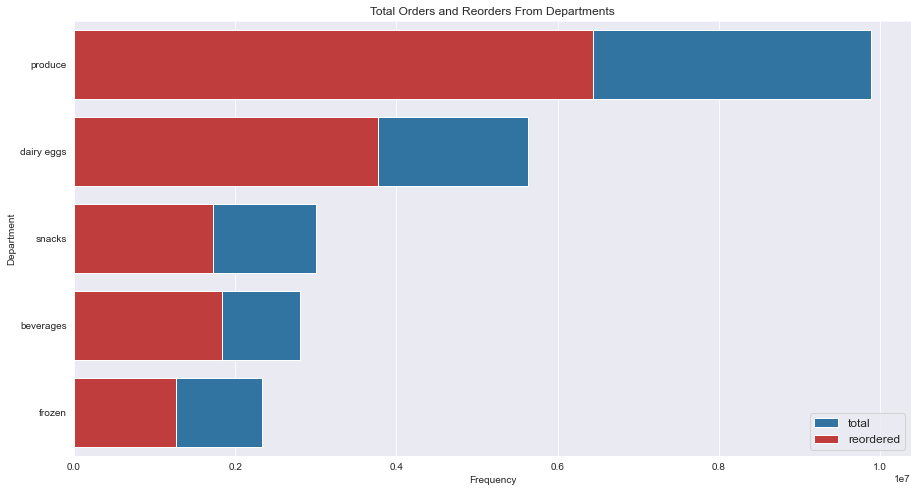

In [40]:
fig, ax = plt.subplots(figsize = (15,8))
ax = sns.barplot(y = temp_df.department[0:5], x = temp_df["total"][0:5], color=color[0], label = "total")
ax = sns.barplot(y = temp_df.department[0:5], x = temp_df["reorders"][0:5], color=color[3], label = "reordered")
ax.set_ylabel("Department")
ax.set_xlabel("Frequency")
ax.legend(loc = 4, prop={'size': 12})
ax.set_title("Total Orders and Reorders From Departments")
plt.show()

In [41]:
order_products[order_products['department'] =='produce']

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce,202279,prior,3,5,9,8.0
5,2,17794,6,1,Carrots,83,4,fresh vegetables,produce,202279,prior,3,5,9,8.0
8,2,43668,9,0,Classic Blend Cole Slaw,123,4,packaged vegetables fruits,produce,202279,prior,3,5,9,8.0
11,3,17704,3,1,Lemons,123,4,packaged vegetables fruits,produce,205970,prior,16,5,17,12.0
12,3,21903,4,1,Organic Baby Spinach,123,4,packaged vegetables fruits,produce,205970,prior,16,5,17,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33819072,3420998,8174,27,0,Organic Navel Orange,24,4,fresh fruits,produce,123299,train,25,6,18,30.0
33819075,3421026,15261,2,0,Organic Rosemary,16,4,fresh herbs,produce,174668,train,4,0,20,30.0
33819084,3421049,26800,5,0,Organic Baby Kale Mix,123,4,packaged vegetables fruits,produce,189544,train,4,1,9,3.0
33819085,3421049,34243,6,0,Organic Baby Broccoli,83,4,fresh vegetables,produce,189544,train,4,1,9,3.0


#### The departments with higher reorder are produce, dairy products, eggs,snacks as per the plot above

In [42]:
temp_df = order_products.groupby("product_name")["reordered"].agg(['count','sum']).rename(columns = {'count':'total','sum':'reorders'})
temp_df = temp_df.sort_values('total', ascending=False).reset_index()


In [43]:
temp_df

,product_name,total,reorders
0,Banana,491291,415166.0
1,Bag of Organic Bananas,394930,329275.0
2,Organic Strawberries,275577,214448.0
3,Organic Baby Spinach,251705,194939.0
4,Organic Hass Avocado,220877,176173.0
...,...,...,...
49680,Greek Blended Cherry Fat Free Yogurt,1,0.0
49681,All Natural Stevia Liquid Extract Sweetener,1,0.0
49682,"Frittata, Farmer's Market",1,0.0
49683,Max White With Polishing Star Soft Toothbrush,1,0.0


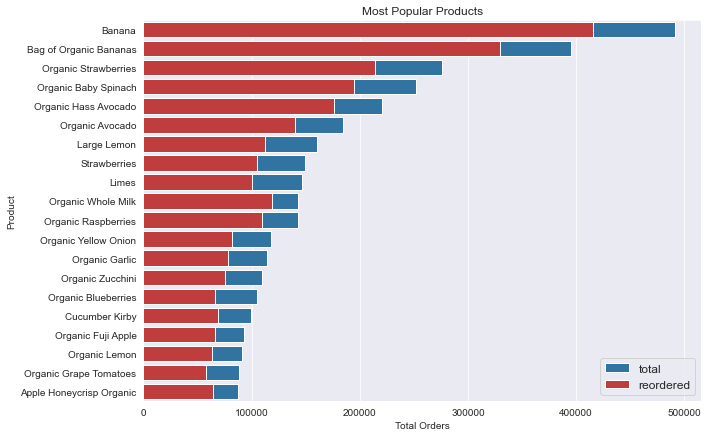

In [44]:
#Most popular products

fig, ax = plt.subplots(figsize = (10,7))
ax = sns.barplot(y = temp_df.product_name[0:20], x = temp_df.total[0:20], color=color[0], label = "total")
ax = sns.barplot(y = temp_df.product_name[0:20], x = temp_df.reorders[0:20], color=color[3], label = "reordered")
ax.set_ylabel("Product")
ax.set_xlabel("Total Orders")
ax.set_title("Most Popular Products")
ax.legend(loc = 4, prop={'size': 12})
plt.show()

In [45]:
temp_df["reorder_ratio"] = temp_df.reorders/temp_df.total
temp_df.sort_values("reorder_ratio", ascending=False).head(10)

,product_name,total,reorders,reorder_ratio
23853,Raw Veggie Wrappers,69,65.0,0.942029
21388,Serenity Ultimate Extrema Overnight Pads,90,84.0,0.933333
40147,Orange Energy Shots,13,12.0,0.923077
20296,Chocolate Love Bar,102,94.0,0.921569
30746,Soy Powder Infant Formula,35,32.0,0.914286
28078,Simply Sleep Nighttime Sleep Aid,45,41.0,0.911111
35213,"Energy Shot, Grape Flavor",22,20.0,0.909091
32316,Russian River Valley Reserve Pinot Noir,30,27.0,0.900000
23918,Bars Peanut Butter,69,62.0,0.898551
24218,Soy Crisps Lightly Salted,67,60.0,0.895522


In [46]:
product_unique_users = order_products.groupby('product_name')['user_id'].nunique().reset_index().rename(columns={'user_id':'total_users'})
product_unique_users.sort_values('total_users', ascending = False).head(10)

,product_name,total_users
3677,Banana,76125
3472,Bag of Organic Bananas,65655
31923,Organic Strawberries,61129
28843,Organic Baby Spinach,56766
22415,Large Lemon,48614
23422,Limes,46658
42908,Strawberries,44857
30300,Organic Hass Avocado,44704
28807,Organic Avocado,43954
29011,Organic Blueberries,38720


In [47]:
product_unique_users = product_unique_users.merge(temp_df, on='product_name', how='left')
product_unique_users.sort_values("reorder_ratio", ascending=False).head(20)

,product_name,total_users,total,reorders,reorder_ratio
37379,Raw Veggie Wrappers,4,69,65.0,0.942029
39870,Serenity Ultimate Extrema Overnight Pads,6,90,84.0,0.933333
28415,Orange Energy Shots,1,13,12.0,0.923077
8537,Chocolate Love Bar,8,102,94.0,0.921569
41723,Soy Powder Infant Formula,3,35,32.0,0.914286
40458,Simply Sleep Nighttime Sleep Aid,4,45,41.0,0.911111
13844,"Energy Shot, Grape Flavor",2,22,20.0,0.909091
38793,Russian River Valley Reserve Pinot Noir,3,30,27.0,0.900000
3832,Bars Peanut Butter,7,69,62.0,0.898551
41712,Soy Crisps Lightly Salted,7,67,60.0,0.895522


In [48]:
#Cumulative Sum of Unique Users Per Product
temp_df = product_unique_users.sort_values("total_users", ascending=False)
temp_df['cum_users'] = temp_df['total_users'].cumsum()
temp_df = temp_df.reset_index(drop=True)
temp_df.head()

,product_name,total_users,total,reorders,reorder_ratio,cum_users
0,Banana,76125,491291,415166.0,0.845051,76125
1,Bag of Organic Bananas,65655,394930,329275.0,0.833755,141780
2,Organic Strawberries,61129,275577,214448.0,0.778178,202909
3,Organic Baby Spinach,56766,251705,194939.0,0.774474,259675
4,Large Lemon,48614,160792,112178.0,0.697659,308289


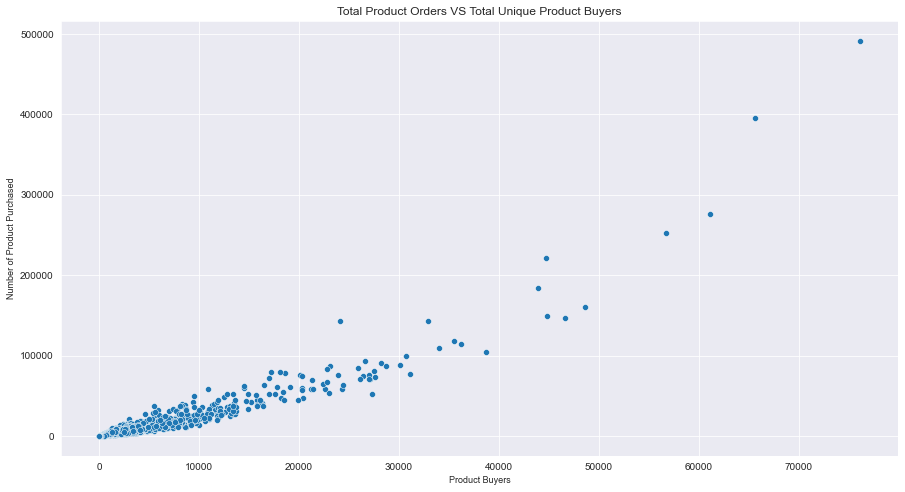

In [49]:
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.scatterplot(y = product_unique_users.total, x = product_unique_users.total_users)
ax.set_xlabel("Product Buyers", size = 9)
ax.set_ylabel("Number of Product Purchased", size = 9)
ax.set_title("Total Product Orders VS Total Unique Product Buyers", size = 12)
plt.show()

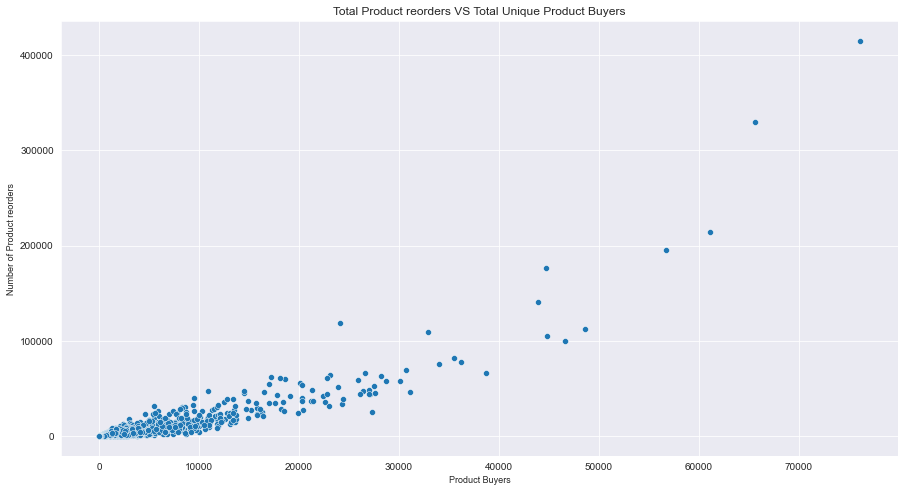

In [50]:
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.scatterplot(y = product_unique_users.reorders, x = product_unique_users.total_users)
ax.set_xlabel("Product Buyers", size = 9)
ax.set_ylabel("Number of Product reorders", size = 9)
ax.set_title("Total Product reorders VS Total Unique Product Buyers", size = 12)
plt.show()

In [51]:
# Let us understand the Organic Vs Inorganic products

In [53]:
product_unique_users.head()

,product_name,total_users,total,reorders,reorder_ratio
0,#2 Coffee Filters,534,799,265.0,0.331665
1,#2 Cone White Coffee Filters,11,14,3.0,0.214286
2,#2 Mechanical Pencils,9,9,0.0,0.000000
3,#4 Natural Brown Coffee Filters,157,247,90.0,0.364372
4,& Go! Hazelnut Spread + Pretzel Sticks,81,174,93.0,0.534483


In [56]:
product_unique_users['product_name'].unique()

array(['#2 Coffee Filters', '#2 Cone White Coffee Filters',
       '#2 Mechanical Pencils', ...,
       'with Xylitol Watermelon Twist 18 Sticks Sugar Free Gum',
       'with a Splash of Mango Coconut Water',
       'with a Splash of Pineapple Coconut Water'], dtype=object)

In [58]:
product_unique_users['Organic'] = product_unique_users.product_name.str.contains("Organic")
product_unique_users.head()

,product_name,total_users,total,reorders,reorder_ratio,Organic
0,#2 Coffee Filters,534,799,265.0,0.331665,False
1,#2 Cone White Coffee Filters,11,14,3.0,0.214286,False
2,#2 Mechanical Pencils,9,9,0.0,0.000000,False
3,#4 Natural Brown Coffee Filters,157,247,90.0,0.364372,False
4,& Go! Hazelnut Spread + Pretzel Sticks,81,174,93.0,0.534483,False


In [59]:
product_unique_users['Organic'].value_counts()

False    44650
True      5035
Name: Organic, dtype: int64

In [60]:
#In all there are 5035 Orgnaic products

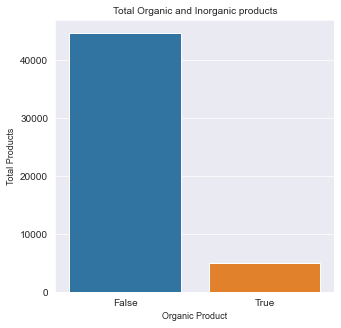

In [67]:
fig, ax = plt.subplots(figsize=(5,5))
ax = sns.barplot(x = product_unique_users.groupby('Organic').size().index, y = product_unique_users.groupby('Organic').size().values)
ax.set_xlabel("Organic Product", size = 9)
ax.set_ylabel("Total Products", size = 9)
ax.set_title("Total Organic and Inorganic products", size = 10)
plt.show()

In [68]:
product_unique_users.groupby('Organic').size().values

array([44650,  5035], dtype=int64)

In [70]:
product_unique_users.groupby('Organic').size().index

Index([False, True], dtype='object', name='Organic')

In [71]:
product_unique_users.groupby('Organic')['reorder_ratio'].mean()

Organic
False    0.364523
True     0.403215
Name: reorder_ratio, dtype: float64

In [72]:
#clearly we can see that average reorder ratio is higher for Organic

In [73]:
product_unique_users.groupby('Organic')['reorder_ratio'].mean().index

Index([False, True], dtype='object', name='Organic')

In [74]:
product_unique_users.groupby('Organic')['reorder_ratio'].mean().values

array([0.36452262, 0.40321478])

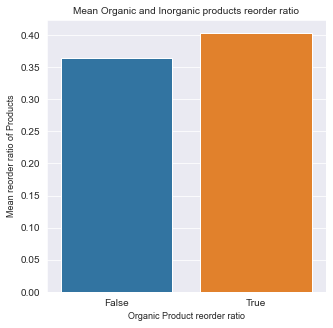

In [75]:
fig, ax = plt.subplots(figsize=(5,5))
ax = sns.barplot(x = product_unique_users.groupby('Organic')['reorder_ratio'].mean().index, y = product_unique_users.groupby('Organic')['reorder_ratio'].mean().values)
ax.set_xlabel("Organic Product reorder ratio", size = 9)
ax.set_ylabel("Mean reorder ratio of Products", size = 9)
ax.set_title("Mean Organic and Inorganic products reorder ratio", size = 10)
plt.show()

In [79]:
order_products.groupby('add_to_cart_order')['reordered'].mean()

add_to_cart_order
1      0.679302
2      0.677135
3      0.658426
4      0.637350
5      0.617598
         ...   
141    0.000000
142    0.000000
143    0.000000
144    0.000000
145    0.000000
Name: reordered, Length: 145, dtype: float64

In [80]:
order_products.columns

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered',
       'product_name', 'aisle_id', 'department_id', 'aisle', 'department',
       'user_id', 'eval_set', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order'],
      dtype='object')

### Most popular products in different days of week


In [83]:
temp_df = order_products.groupby(['order_dow', 'product_name']).size().reset_index(name='counts')
temp_df

,order_dow,product_name,counts
0,0,#2 Coffee Filters,144
1,0,#2 Cone White Coffee Filters,1
2,0,#2 Mechanical Pencils,1
3,0,#4 Natural Brown Coffee Filters,49
4,0,& Go! Hazelnut Spread + Pretzel Sticks,17
...,...,...,...
319951,6,with Xylitol Unwrapped Original Flavor 50 Stic...,3
319952,6,with Xylitol Unwrapped Spearmint 50 Sticks Sug...,8
319953,6,with Xylitol Watermelon Twist 18 Sticks Sugar ...,10
319954,6,with a Splash of Mango Coconut Water,7


In [85]:
#order_products.groupby(['order_dow', 'product_name']).size()

In [88]:
temp_df = temp_df.sort_values(['order_dow', 'product_name'], ascending = [True, False])
temp_df

,order_dow,product_name,counts
46428,0,with a Splash of Pineapple Coconut Water,10
46427,0,with a Splash of Mango Coconut Water,4
46426,0,with Xylitol Watermelon Twist 18 Sticks Sugar ...,11
46425,0,with Xylitol Unwrapped Spearmint 50 Sticks Sug...,8
46424,0,with Xylitol Unwrapped Original Flavor 50 Stic...,4
...,...,...,...
274029,6,& Go! Hazelnut Spread + Pretzel Sticks,15
274028,6,#4 Natural Brown Coffee Filters,23
274027,6,#2 Mechanical Pencils,1
274026,6,#2 Cone White Coffee Filters,3


In [89]:
temp_df = temp_df.groupby('order_dow').head(5).reset_index(drop = True)
temp_df

,order_dow,product_name,counts
0,0,with a Splash of Pineapple Coconut Water,10
1,0,with a Splash of Mango Coconut Water,4
2,0,with Xylitol Watermelon Twist 18 Sticks Sugar ...,11
3,0,with Xylitol Unwrapped Spearmint 50 Sticks Sug...,8
4,0,with Xylitol Unwrapped Original Flavor 50 Stic...,4
5,1,with a Splash of Pineapple Coconut Water,13
6,1,with a Splash of Mango Coconut Water,5
7,1,with Xylitol Watermelon Twist 18 Sticks Sugar ...,13
8,1,with Xylitol Unwrapped Spearmint 50 Sticks Sug...,9
9,1,with Xylitol Unwrapped Original Flavor 50 Stic...,6


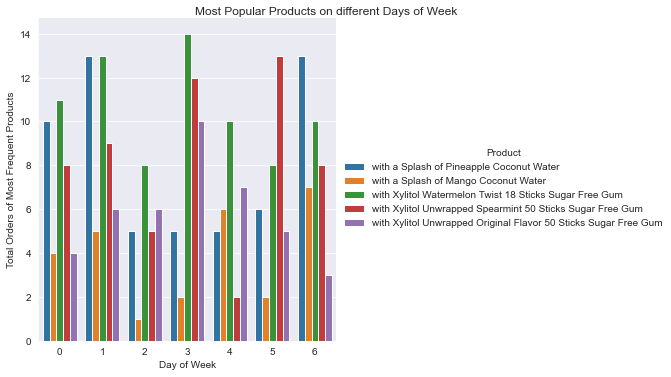

In [94]:
ax = sns.catplot(x="order_dow", y="counts", hue="product_name", data=temp_df, kind="bar", legend=False)
ax.add_legend(title="Product")
ax.set_axis_labels("Day of Week", "Total Orders of Most Frequent Products")
ax.fig.suptitle("Most Popular Products on different Days of Week", va="baseline", ha="center")
ax.savefig("Most Popular Products on Different Days of Week.png")

In [95]:
#Plot we can see that differen products are sold in different week of the days